## Importing The Necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

## Reading The Files Data

In [4]:
file = 'LendingData.csv'
data = pd.read_csv(file, delimiter='\t')

C:\Users\habee\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (17,45,53) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# DATA WRANGLING

In [5]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,...,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,...,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,...,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,...,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,...,75.000000,1.000000,2.000000,4485.500000,62.100000,2.380000e+04,0.000000,0.000000,2.000000,0.000000
75%,5.446311e+07,5.803559e+07,20000.000000,20000.000000,20000.000000,15.990000,571.560000,9.000000e+04,23.900000,0.000000,...,87.500000,2.000000,4.000000,7701.250000,75.300000,3.990000e+04,1.000000,2.000000,3.000000,0.000000
max,6.861687e+07,7.351969e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,223.300000,22.000000,43.000000,83047.000000,151.400000,9.999999e+06,15.000000,33.000000,32.000000,1.000000


In [7]:
data.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
total_rev_hi_lim     67313
inq_fi              842681
total_cu_tl         842681
inq_last_12m        842681
default_ind              0
Length: 73, dtype: int64

In [8]:
data.shape

(855969, 73)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  float64
 3   funded_amnt                  855969 non-null  float64
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

# FEATURES ENGINEERING

## Dropping The Columns with NA Values 

In [10]:
data = data.dropna(axis=1)

In [11]:
## Checking Columns shape After Dropping The Columns with NaN Values

data.shape

(855969, 41)

## Checking If NaN Values Is Still Available In The Data

In [12]:
data.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
pymnt_plan                 0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries    

In [13]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,5000.00,861.07,0.00,0.00,0.00,171.62,1.0,INDIVIDUAL,0.0,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,119.66,1.0,INDIVIDUAL,0.0,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,2400.00,603.65,0.00,0.00,0.00,649.91,1.0,INDIVIDUAL,0.0,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,10000.00,2209.33,16.97,0.00,0.00,357.48,1.0,INDIVIDUAL,0.0,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,2233.10,1009.07,0.00,0.00,0.00,67.79,1.0,INDIVIDUAL,0.0,0


## Setting And Sorting The " Issue_d " as The Column Index 

In [14]:
data.set_index(data['issue_d'], inplace=True)

In [15]:
data['issue_d'].head()

issue_d
Dec-2011    Dec-2011
Dec-2011    Dec-2011
Dec-2011    Dec-2011
Dec-2011    Dec-2011
Dec-2011    Dec-2011
Name: issue_d, dtype: object

## Sorting The Index Column In Ascending Order

In [16]:
data.sort_index(axis=0, inplace=True)

In [17]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,default_ind
issue_d,,,,,,,,,,,,,,,,,,,,,
Apr-2008,331459,331426,6400.0,6400.0,6400.00,36 months,10.39,207.69,B,B4,...,6400.00,1076.46,0.0,0.0,0.0,208.38,1.0,INDIVIDUAL,0.0,0
Apr-2008,317597,317594,4500.0,4500.0,1446.50,36 months,11.97,149.40,C,C4,...,4499.99,878.41,0.0,0.0,0.0,149.40,1.0,INDIVIDUAL,0.0,0
Apr-2008,320231,320222,10000.0,10000.0,3650.62,36 months,10.08,323.05,B,B3,...,10000.00,1628.15,0.0,0.0,0.0,334.73,1.0,INDIVIDUAL,0.0,0
Apr-2008,319964,319922,5700.0,5700.0,4925.00,36 months,10.39,184.97,B,B4,...,5700.00,319.22,0.0,0.0,0.0,725.79,1.0,INDIVIDUAL,0.0,0
Apr-2008,319299,319296,4075.0,4075.0,4050.00,36 months,8.32,128.30,A,A4,...,4075.00,207.55,0.0,0.0,0.0,123.61,1.0,INDIVIDUAL,0.0,0


In [18]:
data['issue_d'].unique()

array(['Apr-2008', 'Apr-2009', 'Apr-2010', 'Apr-2011', 'Apr-2012',
       'Apr-2013', 'Apr-2014', 'Apr-2015', 'Aug-2007', 'Aug-2008',
       'Aug-2009', 'Aug-2010', 'Aug-2011', 'Aug-2012', 'Aug-2013',
       'Aug-2014', 'Aug-2015', 'Dec-2007', 'Dec-2008', 'Dec-2009',
       'Dec-2010', 'Dec-2011', 'Dec-2012', 'Dec-2013', 'Dec-2014',
       'Dec-2015', 'Feb-2008', 'Feb-2009', 'Feb-2010', 'Feb-2011',
       'Feb-2012', 'Feb-2013', 'Feb-2014', 'Feb-2015', 'Jan-2008',
       'Jan-2009', 'Jan-2010', 'Jan-2011', 'Jan-2012', 'Jan-2013',
       'Jan-2014', 'Jan-2015', 'Jul-2007', 'Jul-2008', 'Jul-2009',
       'Jul-2010', 'Jul-2011', 'Jul-2012', 'Jul-2013', 'Jul-2014',
       'Jul-2015', 'Jun-2007', 'Jun-2008', 'Jun-2009', 'Jun-2010',
       'Jun-2011', 'Jun-2012', 'Jun-2013', 'Jun-2014', 'Jun-2015',
       'Mar-2008', 'Mar-2009', 'Mar-2010', 'Mar-2011', 'Mar-2012',
       'Mar-2013', 'Mar-2014', 'Mar-2015', 'May-2008', 'May-2009',
       'May-2010', 'May-2011', 'May-2012', 'May-2013', 'May-20

## Features And Target Variable Selection

In [19]:
X = data.drop(columns=['default_ind', 'id', 'member_id', 'zip_code', 'addr_state', 'earliest_cr_line', 'issue_d'])

In [20]:
y = data['default_ind']

In [21]:
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq
issue_d,,,,,,,,,,,,,,,,,,,,,
Apr-2008,6400.0,6400.0,6400.00,36 months,10.39,207.69,B,B4,RENT,87000.0,...,7476.46,6400.00,1076.46,0.0,0.0,0.0,208.38,1.0,INDIVIDUAL,0.0
Apr-2008,4500.0,4500.0,1446.50,36 months,11.97,149.40,C,C4,MORTGAGE,115200.0,...,1713.12,4499.99,878.41,0.0,0.0,0.0,149.40,1.0,INDIVIDUAL,0.0
Apr-2008,10000.0,10000.0,3650.62,36 months,10.08,323.05,B,B3,RENT,35665.0,...,4063.96,10000.00,1628.15,0.0,0.0,0.0,334.73,1.0,INDIVIDUAL,0.0
Apr-2008,5700.0,5700.0,4925.00,36 months,10.39,184.97,B,B4,RENT,36000.0,...,5200.81,5700.00,319.22,0.0,0.0,0.0,725.79,1.0,INDIVIDUAL,0.0
Apr-2008,4075.0,4075.0,4050.00,36 months,8.32,128.30,A,A4,RENT,19200.0,...,4256.28,4075.00,207.55,0.0,0.0,0.0,123.61,1.0,INDIVIDUAL,0.0


### Replacing Columns with Binary Objects ( pymnt_plan & initial_list_status )  with  with 0 and 1 Respectively

In [22]:
X['pymnt_plan'] = X['pymnt_plan'].replace('n', 0)
X['pymnt_plan'] = X['pymnt_plan'].replace('y', 1)

In [23]:
X['pymnt_plan'].unique()

array([0, 1], dtype=int64)

In [24]:
X['pymnt_plan'].dtype

dtype('int64')

In [25]:
X['initial_list_status'] = X['initial_list_status'].replace('f', 0)
X['initial_list_status'] = X['initial_list_status'].replace('w', 1)

In [26]:
X['initial_list_status'].unique()

array([0, 1], dtype=int64)

### OneHotEncoding Object Columns into Categories Using Pandas

In [27]:
X_encode = pd.get_dummies(X, columns= ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',  'purpose', 'application_type'])

In [28]:
X_encode['loan_amnt'].dtype

dtype('float64')

In [29]:
X_encode.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_INDIVIDUAL,application_type_JOINT
issue_d,,,,,,,,,,,,,,,,,,,,,
Apr-2008,6400.0,6400.0,6400.00,10.39,207.69,87000.0,0,14.79,0.0,2.0,...,0,0,0,0,0,0,0,0,1,0
Apr-2008,4500.0,4500.0,1446.50,11.97,149.40,115200.0,0,15.49,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
Apr-2008,10000.0,10000.0,3650.62,10.08,323.05,35665.0,0,21.57,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
Apr-2008,5700.0,5700.0,4925.00,10.39,184.97,36000.0,0,9.57,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
Apr-2008,4075.0,4075.0,4050.00,8.32,128.30,19200.0,0,1.25,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
column = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'pymnt_plan', 'dti']

In [31]:
X_encode.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'pymnt_plan', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'policy_code', 'acc_now_delinq', 'term_ 36 months',
       'term_ 60 months', 'grade_A', 'grade_B', 'grade_C', 'grade_D',
       'grade_E', 'grade_F', 'grade_G', 'sub_grade_A1', 'sub_grade_A2',
       'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1',
       'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5',
       'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4',
       'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3',
       'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2',
      

## Data Visualization

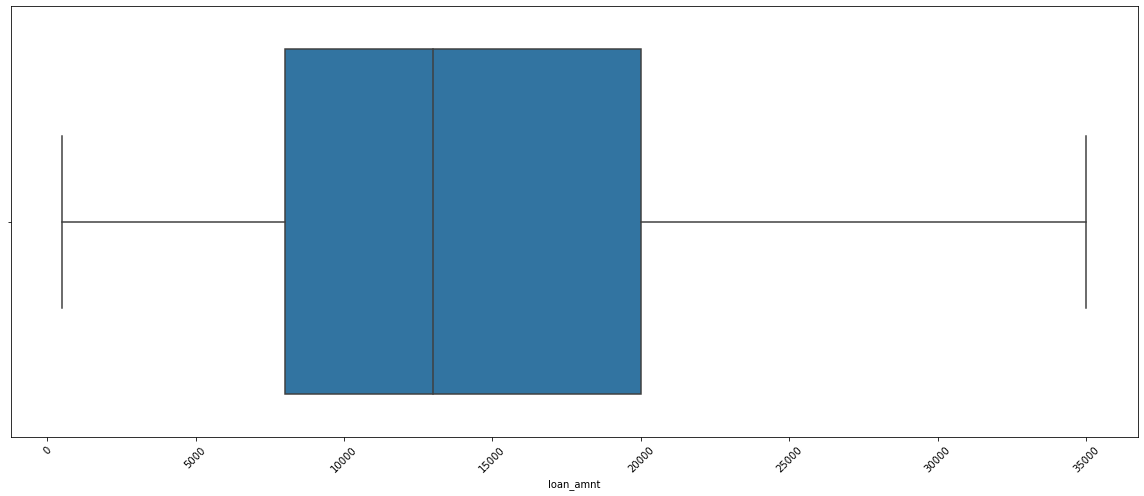

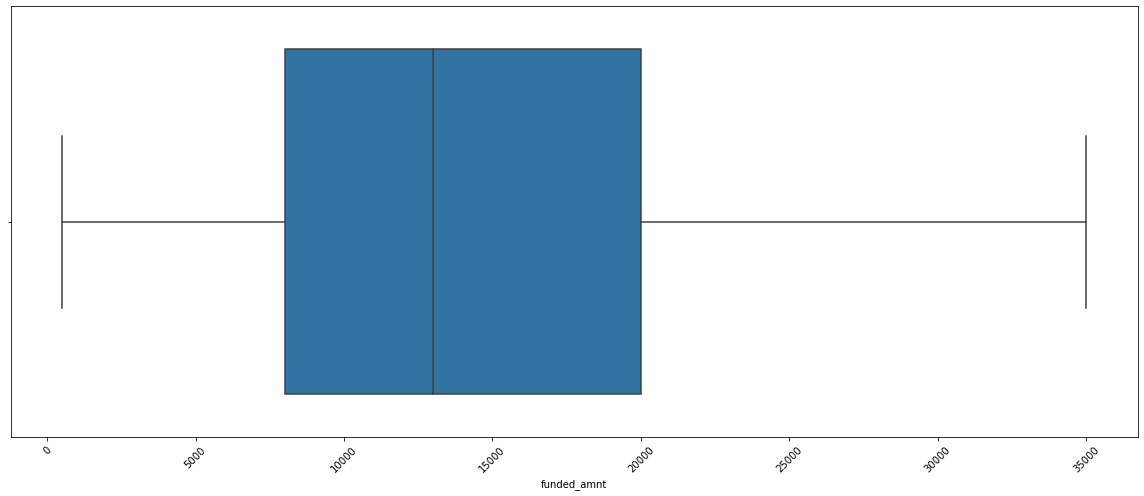

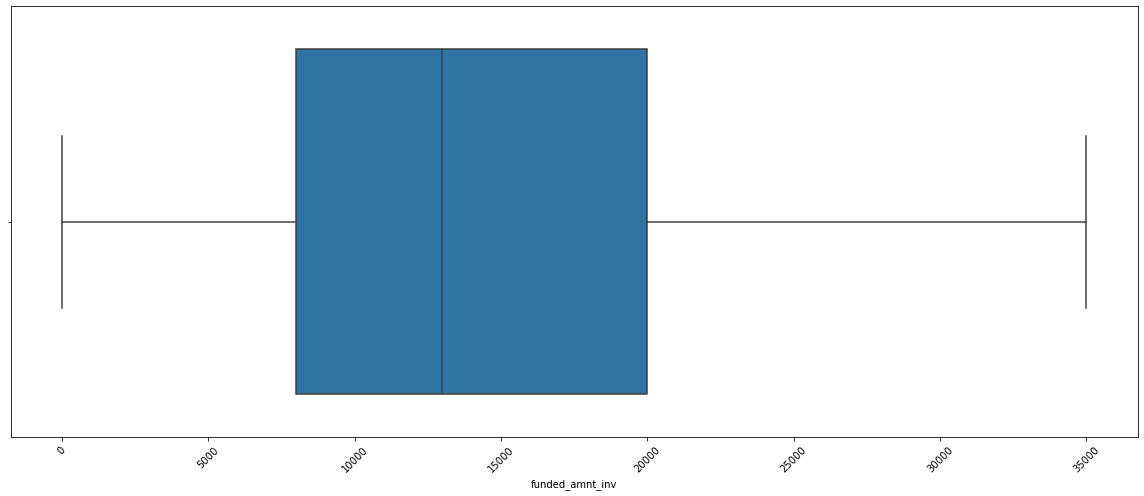

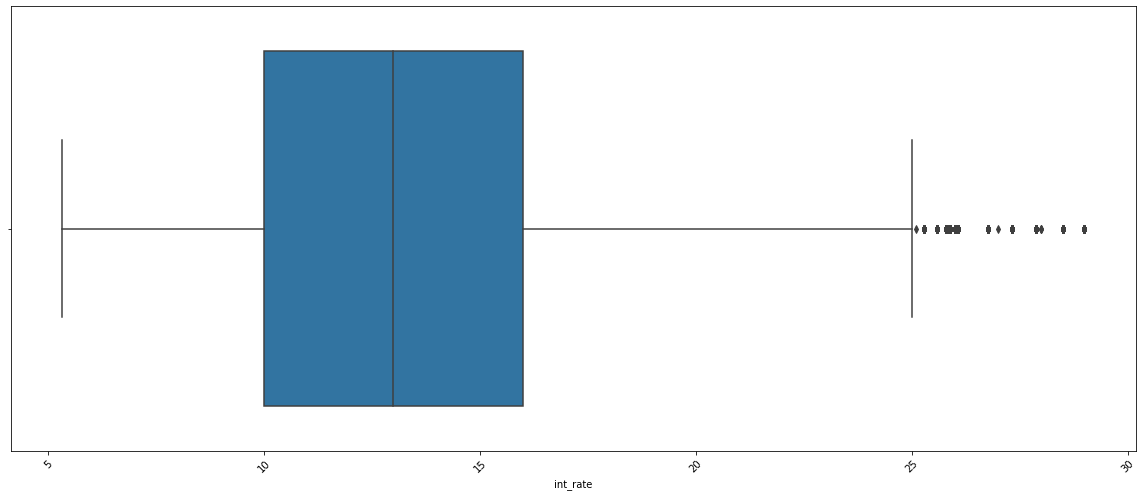

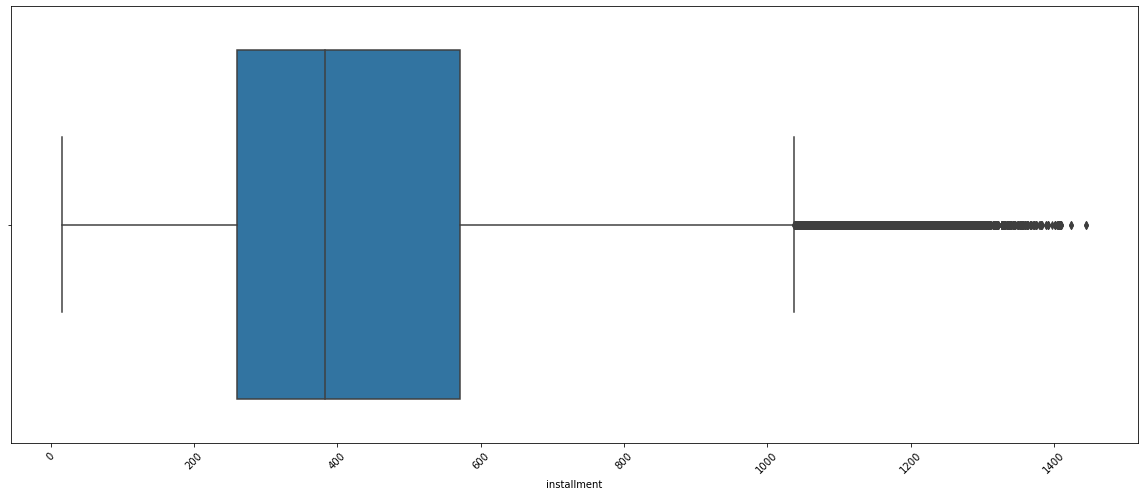

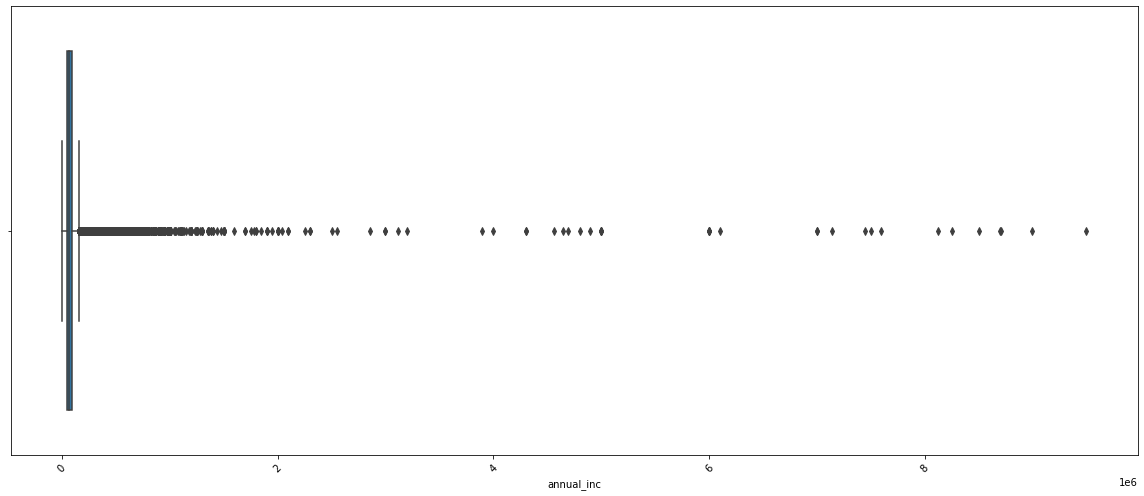

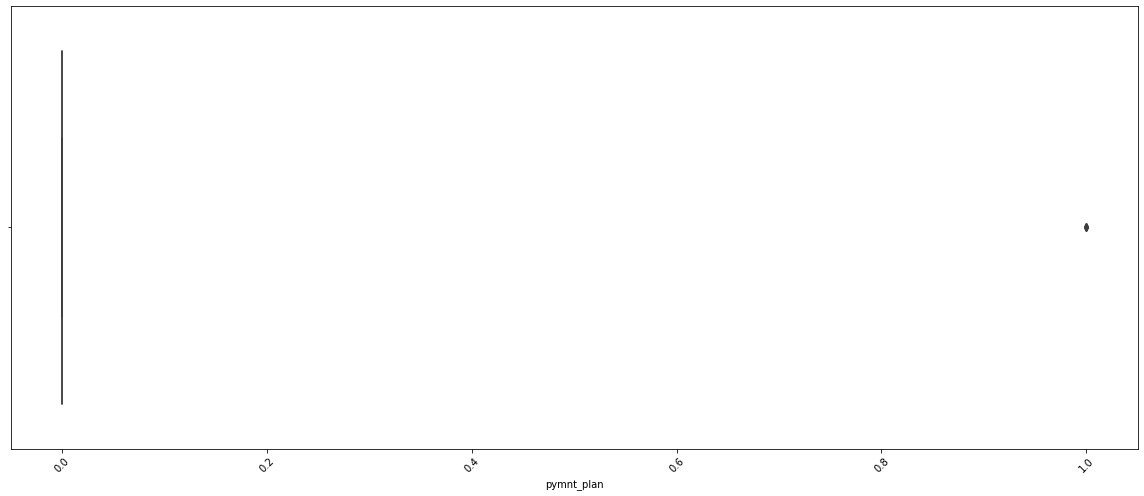

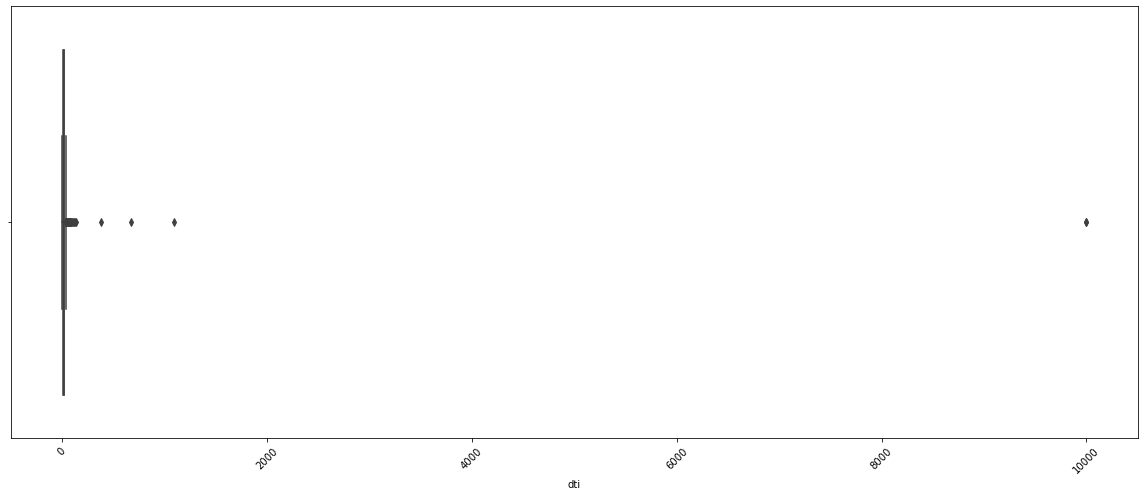

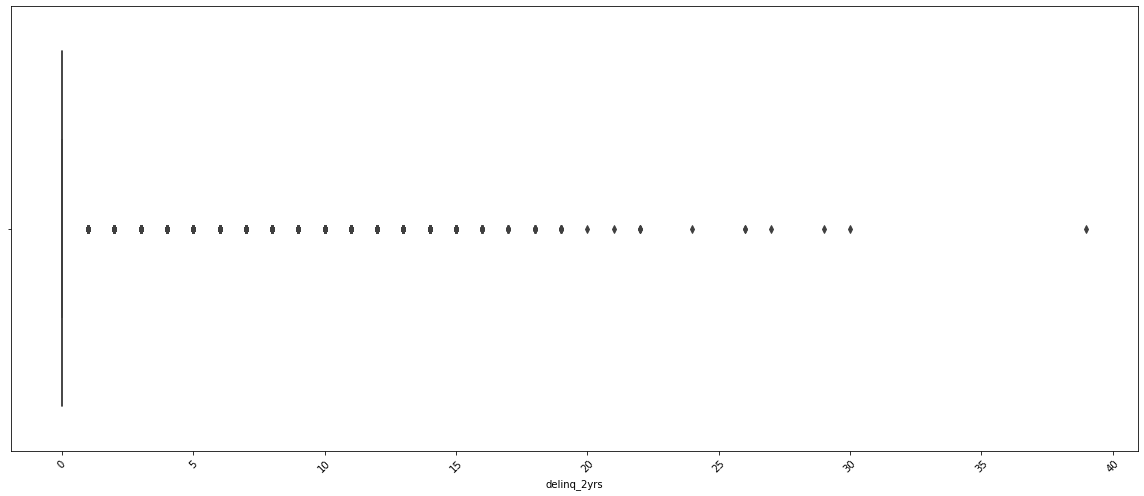

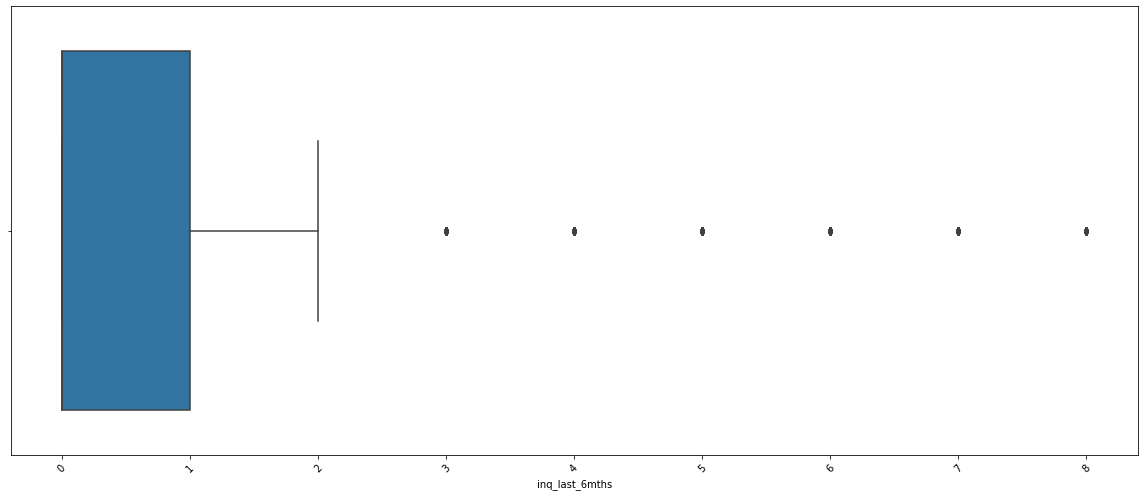

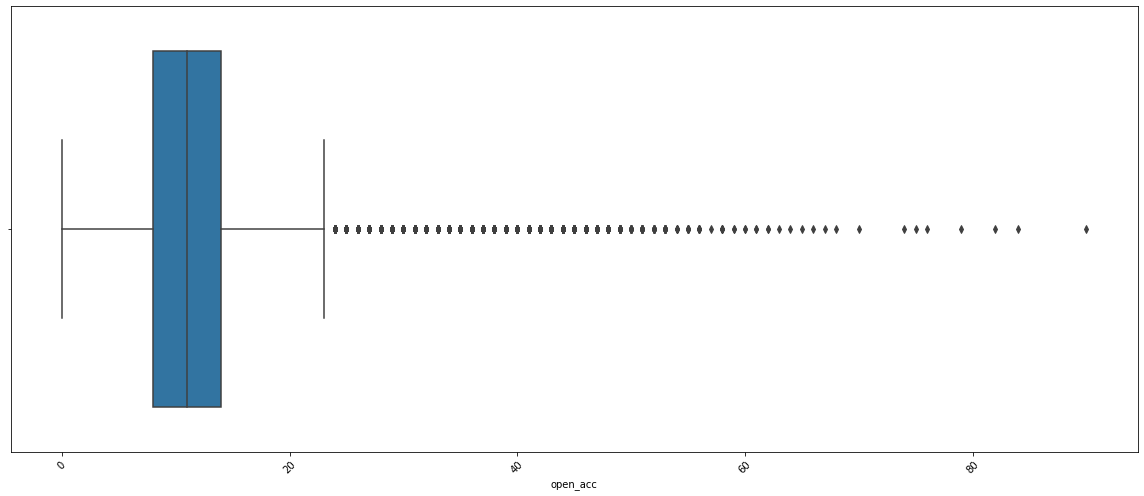

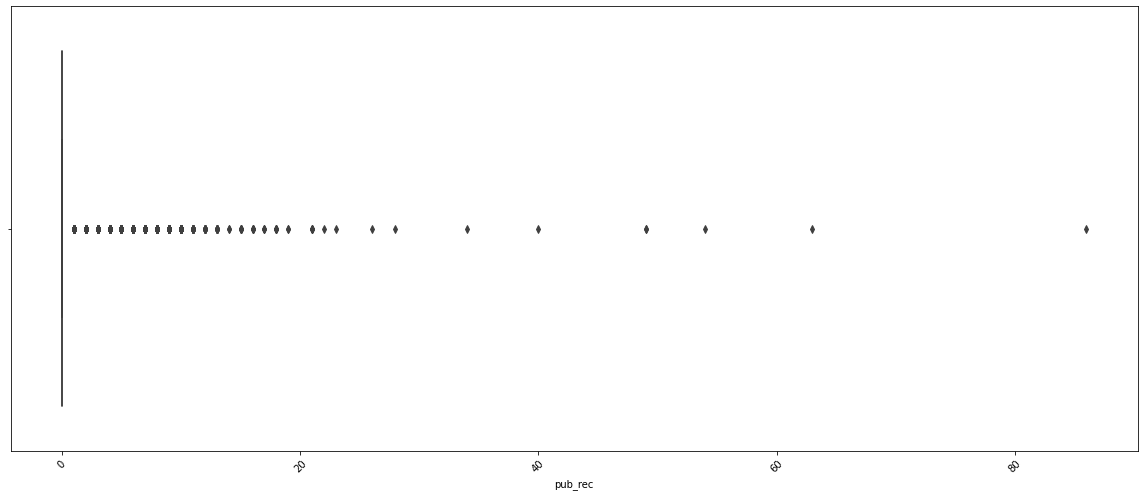

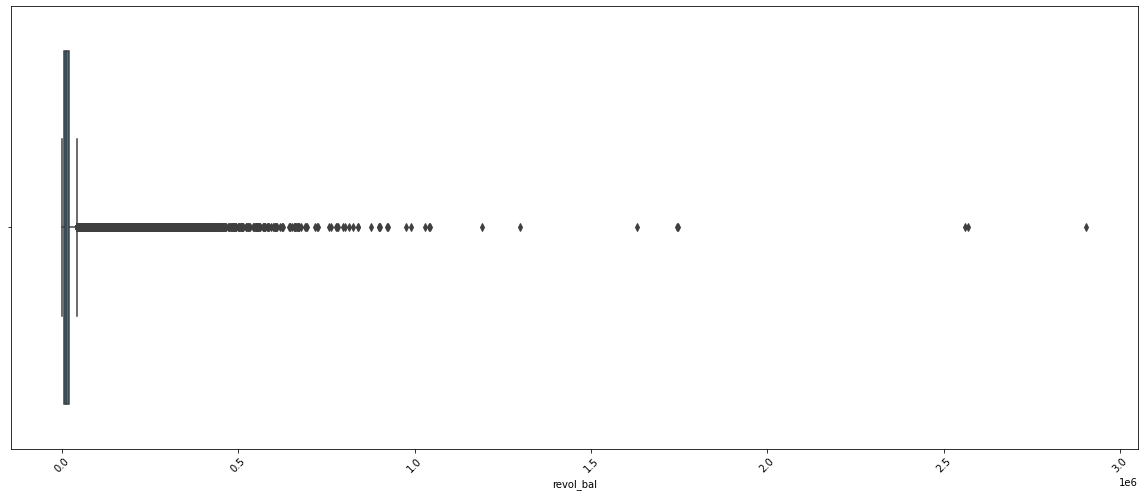

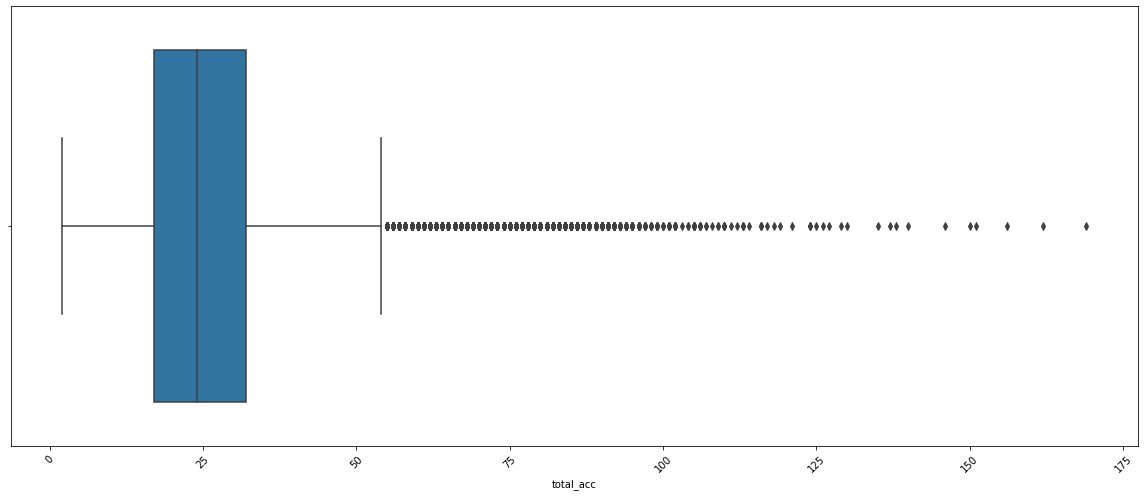

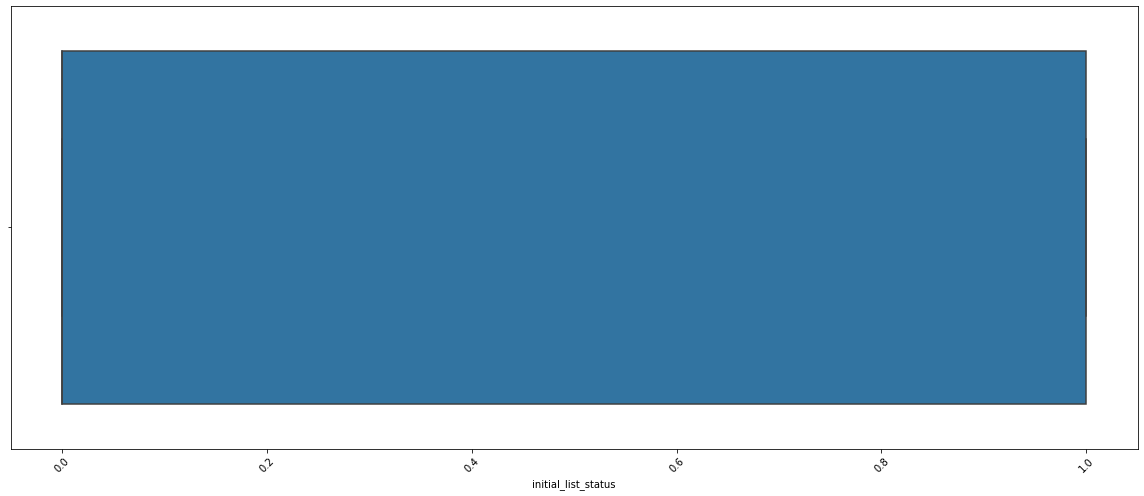

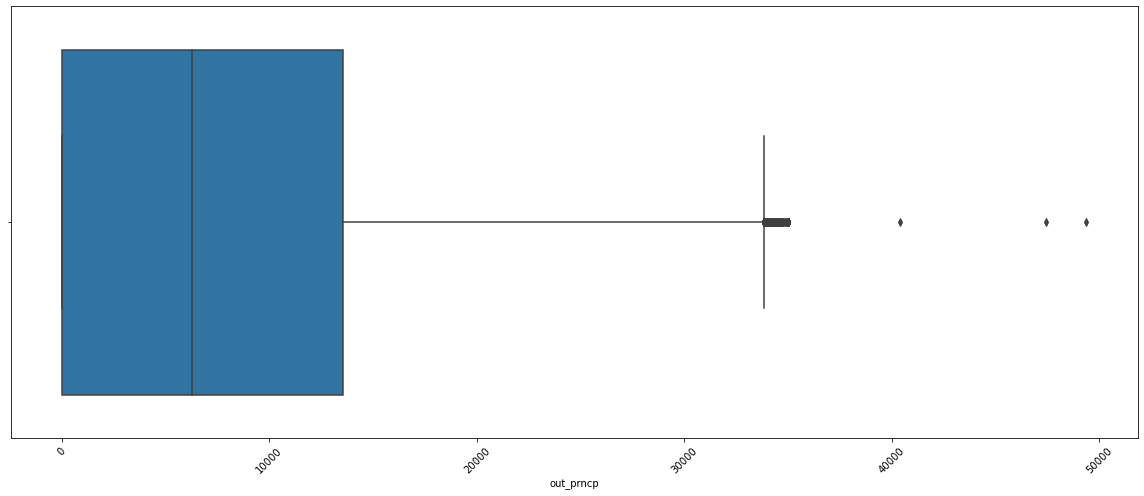

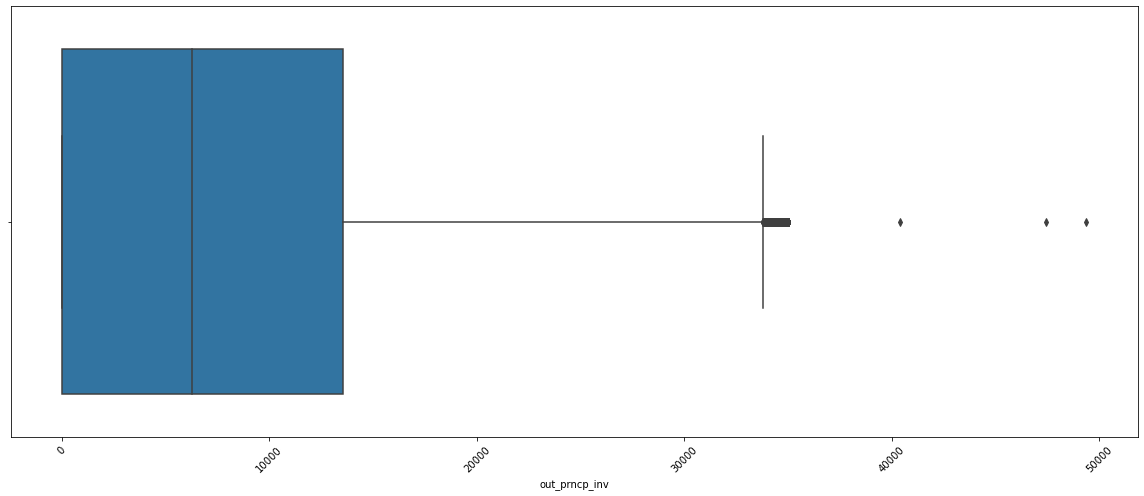

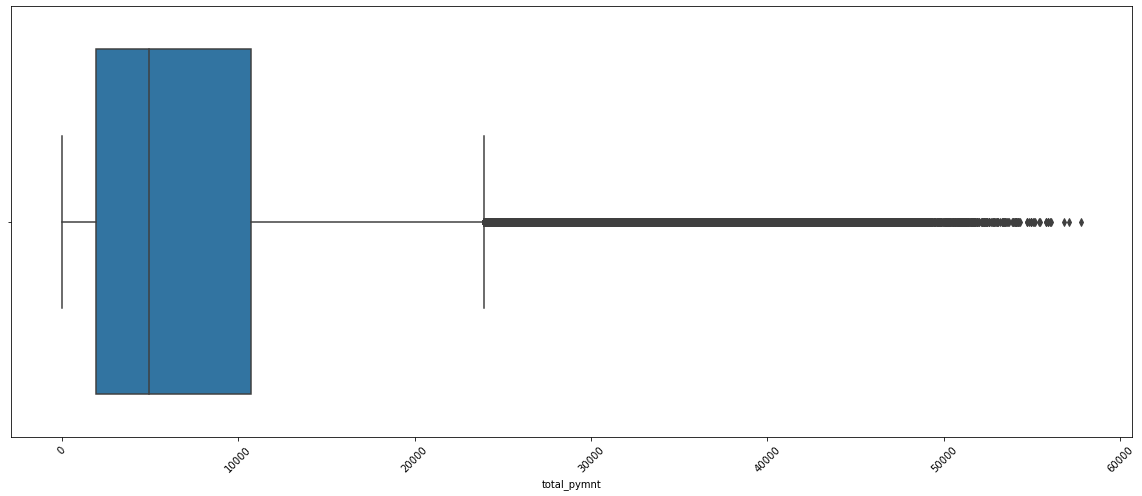

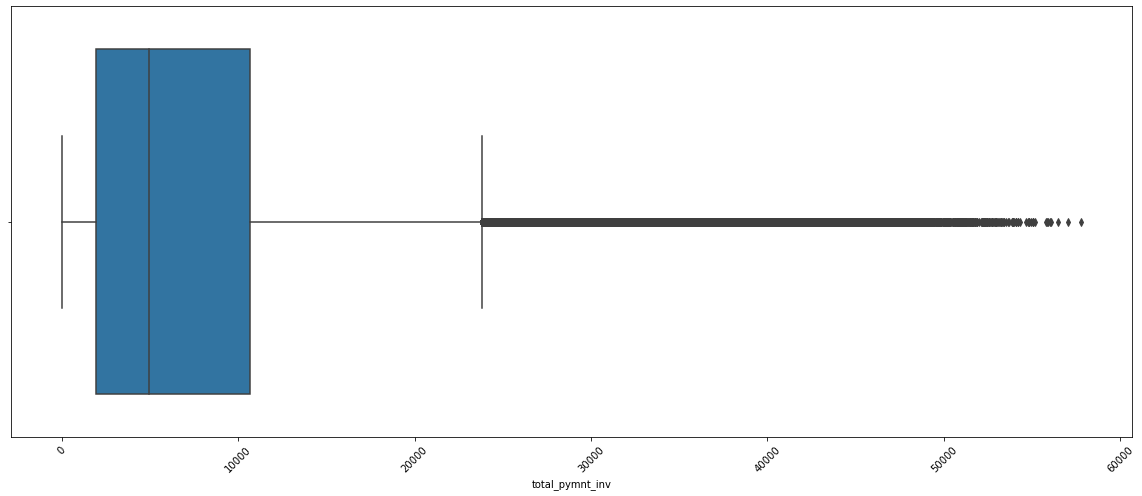

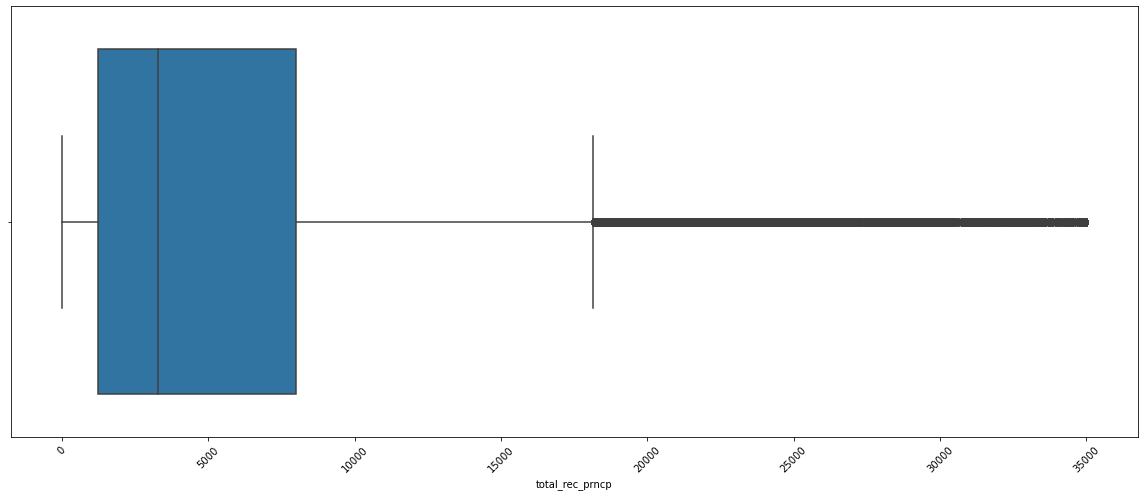

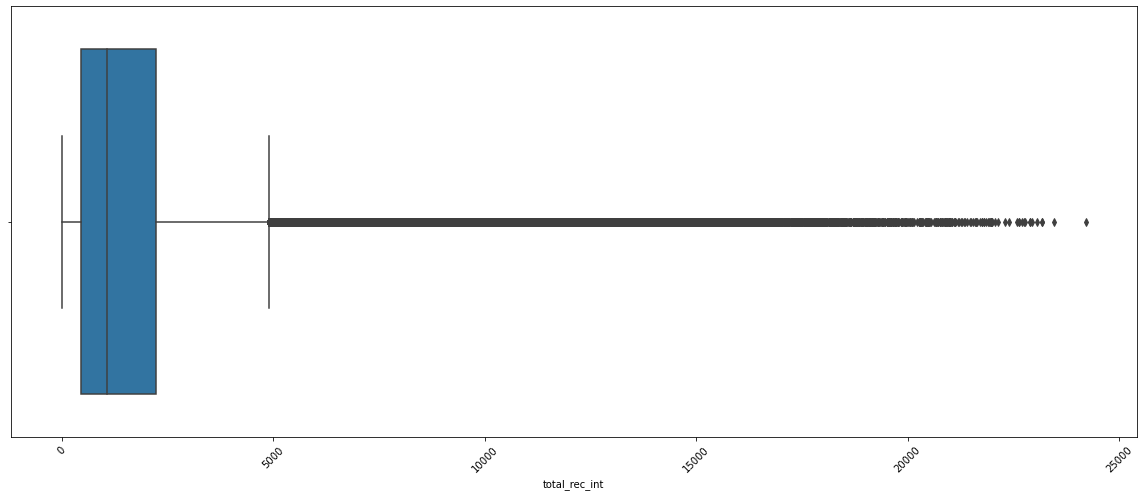

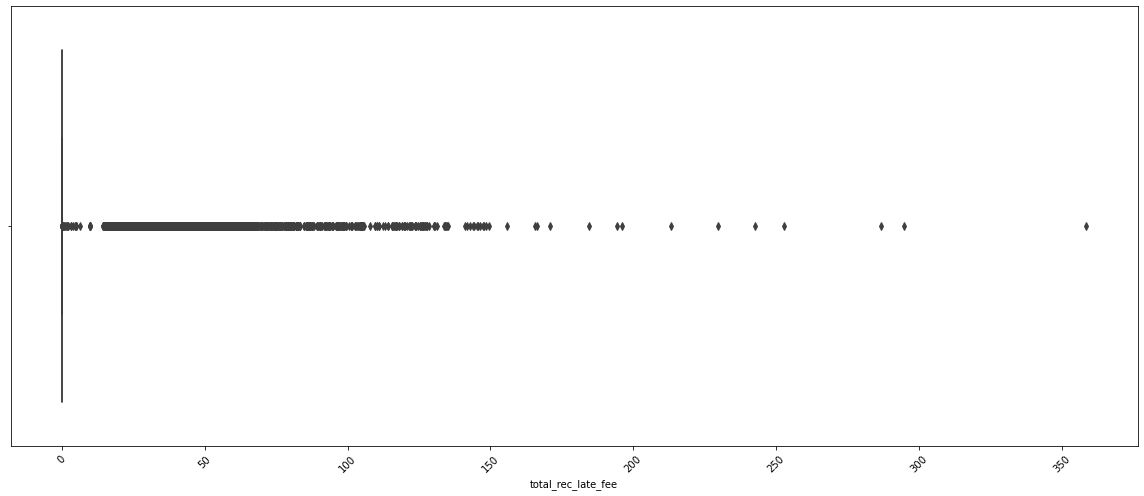

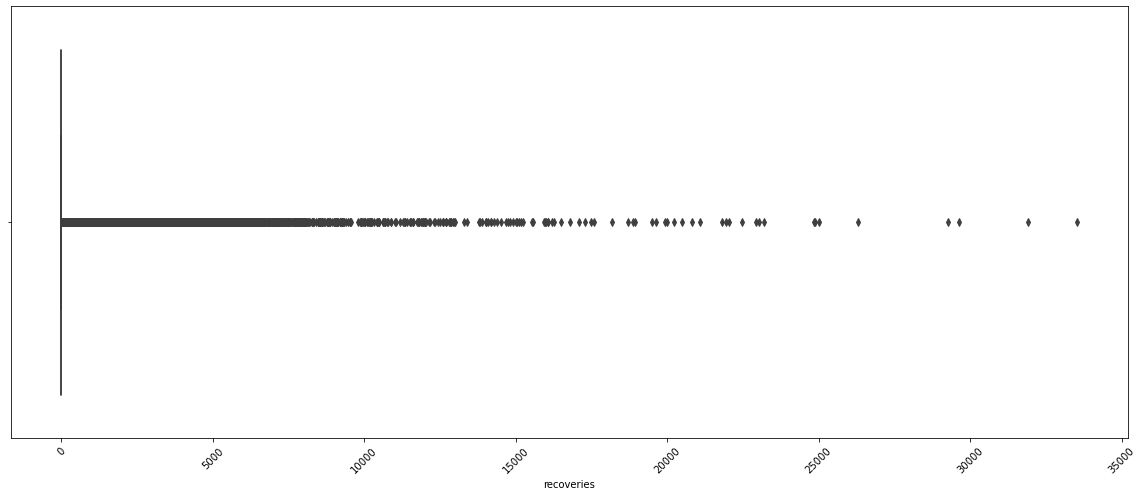

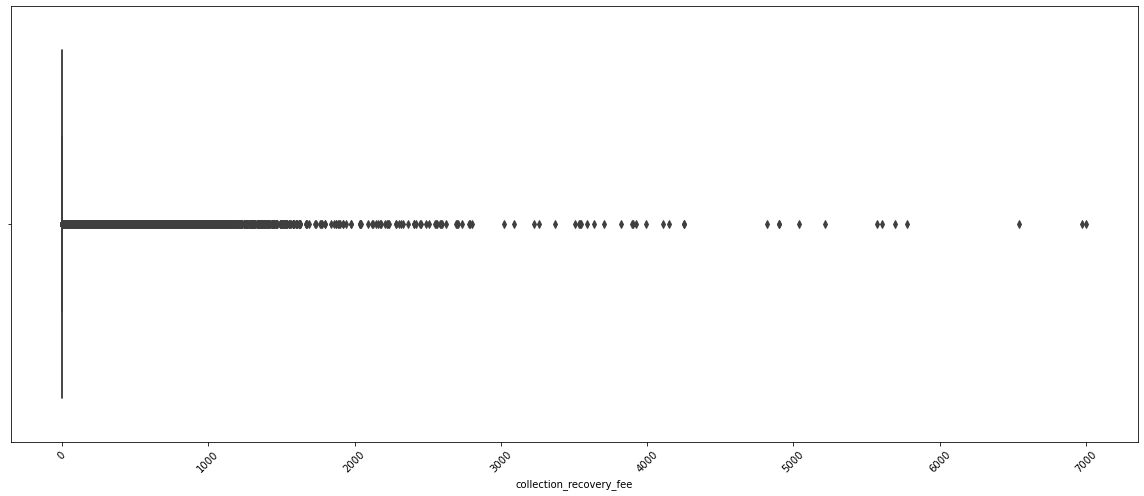

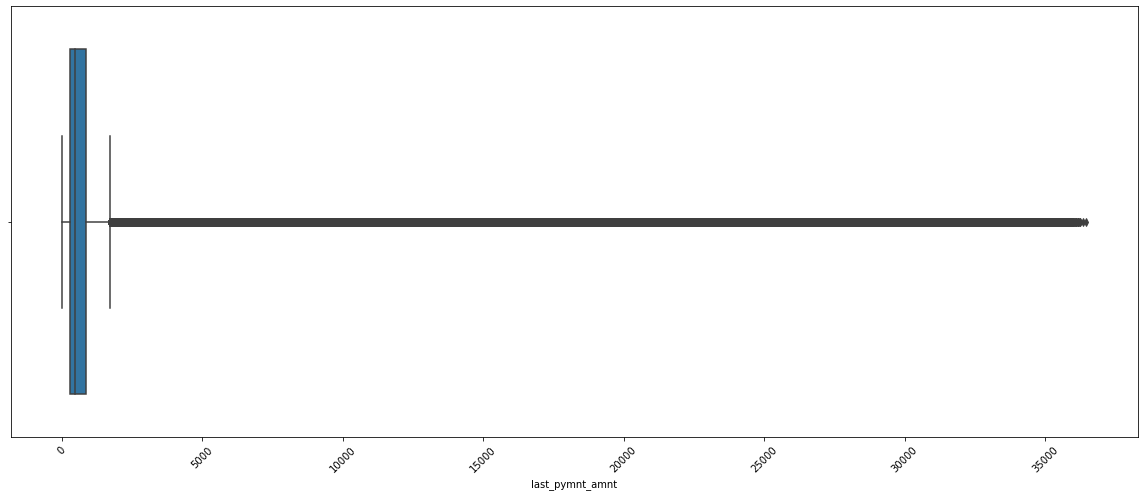

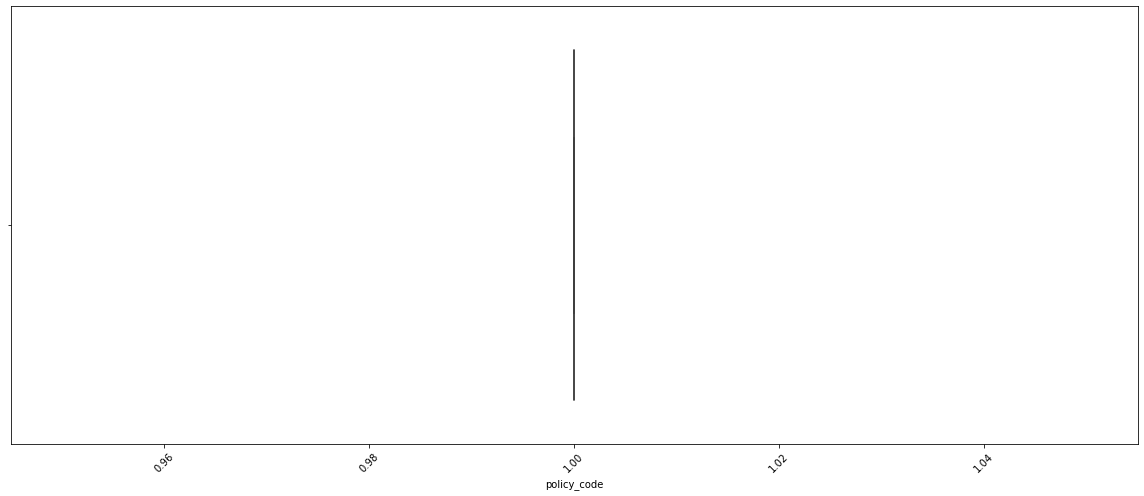

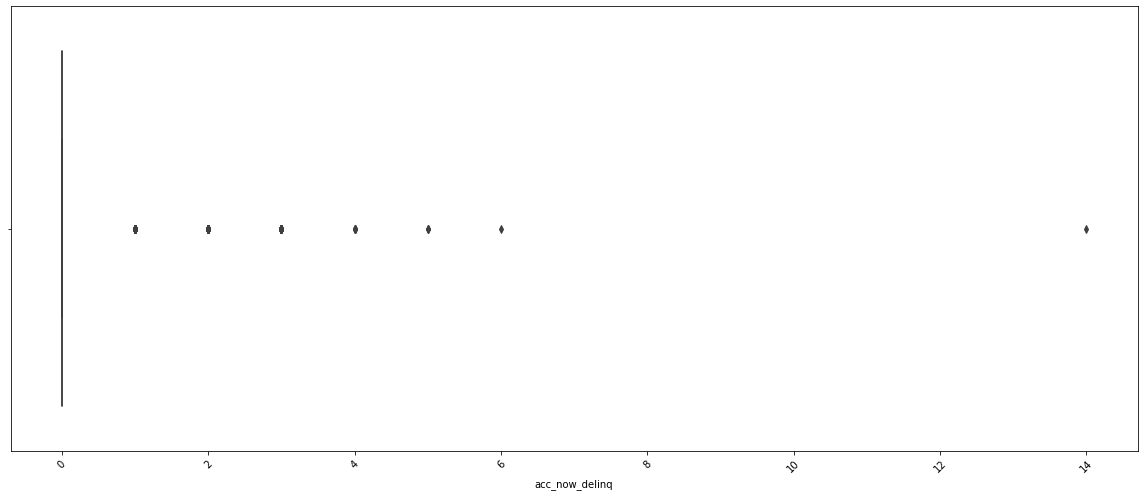

KeyError: 'term_ 36 months'

<Figure size 1152x504 with 0 Axes>

In [32]:
for column in X_encode.columns:
    plt.figure(figsize=(16,7))
    sns.boxplot(x=X[column])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Splitting the data into training and testing set Using The Index Column " Date "

In [33]:
date_limit =  'March-2015'

In [34]:
X_train = X_encode.loc[data['issue_d'] <= date_limit]
X_test = X_encode.loc[data['issue_d'] > date_limit]

In [35]:
y_limit = X_train.shape[0]

In [36]:
y_train = y.iloc[0:y_limit]
y_test = y.iloc[y_limit :]

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((533521, 96), (322448, 96), (533521,), (322448,))

In [38]:
y_train

issue_d
Apr-2008    0
Apr-2008    0
Apr-2008    0
Apr-2008    0
Apr-2008    0
           ..
Mar-2015    0
Mar-2015    0
Mar-2015    0
Mar-2015    0
Mar-2015    0
Name: default_ind, Length: 533521, dtype: int64

## Dropping The Index Column

In [39]:
X_encode = X_encode.reset_index(drop=True)

In [40]:
y = y.reset_index(drop=True)

In [41]:
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq
issue_d,,,,,,,,,,,,,,,,,,,,,
Apr-2008,6400.0,6400.0,6400.00,36 months,10.39,207.69,B,B4,RENT,87000.0,...,7476.46,6400.00,1076.46,0.0,0.0,0.0,208.38,1.0,INDIVIDUAL,0.0
Apr-2008,4500.0,4500.0,1446.50,36 months,11.97,149.40,C,C4,MORTGAGE,115200.0,...,1713.12,4499.99,878.41,0.0,0.0,0.0,149.40,1.0,INDIVIDUAL,0.0
Apr-2008,10000.0,10000.0,3650.62,36 months,10.08,323.05,B,B3,RENT,35665.0,...,4063.96,10000.00,1628.15,0.0,0.0,0.0,334.73,1.0,INDIVIDUAL,0.0
Apr-2008,5700.0,5700.0,4925.00,36 months,10.39,184.97,B,B4,RENT,36000.0,...,5200.81,5700.00,319.22,0.0,0.0,0.0,725.79,1.0,INDIVIDUAL,0.0
Apr-2008,4075.0,4075.0,4050.00,36 months,8.32,128.30,A,A4,RENT,19200.0,...,4256.28,4075.00,207.55,0.0,0.0,0.0,123.61,1.0,INDIVIDUAL,0.0


In [42]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: default_ind, dtype: int64

### Extracting The dataFrame Values for Normalization

In [43]:
X_encode = X_encode.values

In [44]:
np.shape(X_encode)

(855969, 96)

## With The Help of the EDA, we are able to detect Outliers in Our Data, So we have to perform StandardScaling to get rid of the outliers

In [45]:
sc = StandardScaler()
X_encode_sc = sc.fit_transform(X_encode)
X_encode_sc

array([[-0.99053287, -0.9896563 , -0.98507687, ..., -0.05167941,
         0.02272973, -0.02272973],
       [-1.21604319, -1.2153238 , -1.57297353, ..., -0.05167941,
         0.02272973, -0.02272973],
       [-0.56325016, -0.56207578, -1.31138177, ..., -0.05167941,
         0.02272973, -0.02272973],
       ...,
       [ 0.86102554,  0.86319264,  0.86637925, ..., -0.05167941,
         0.02272973, -0.02272973],
       [-1.03800873, -1.03716525, -1.0325501 , ..., -0.05167941,
         0.02272973, -0.02272973],
       [ 1.07763413,  1.07995221,  1.08297588, ..., -0.05167941,
         0.02272973, -0.02272973]])

## Building Our Model Using The Xgboost Classifier

In [46]:
model = XGBClassifier(objective='binary:logistic', random_state=42)

In [47]:
model.fit(X_train,
                  y_train,
                 verbose=True,
                 early_stopping_rounds=10,
                 eval_set=[(X_test, y_test)])

C:\Users\habee\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:41:03] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.44161
[1]	validation_0-logloss:0.30235
[2]	validation_0-logloss:0.21439
[3]	validation_0-logloss:0.15571
[4]	validation_0-logloss:0.11559
[5]	validation_0-logloss:0.08676
[6]	validation_0-logloss:0.06622
[7]	validation_0-logloss:0.05178
[8]	validation_0-logloss:0.04116
[9]	validation_0-logloss:0.03298
[10]	validation_0-logloss:0.02736
[11]	validation_0-logloss:0.02314
[12]	validation_0-logloss:0.02010
[13]	validation_0-logloss:0.01778
[14]	validation_0-logloss:0.01622
[15]	validation_0-logloss:0.01466
[16]	validation_0-logloss:0.01355
[17]	validation_0-logloss:0.01290
[18]	validation_0-logloss:0.01244
[19]	validation_0-logloss:0.01191
[20]	validation_0-logloss:0.01169
[21]	va

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## Plotting The Importance Of The features To The Model

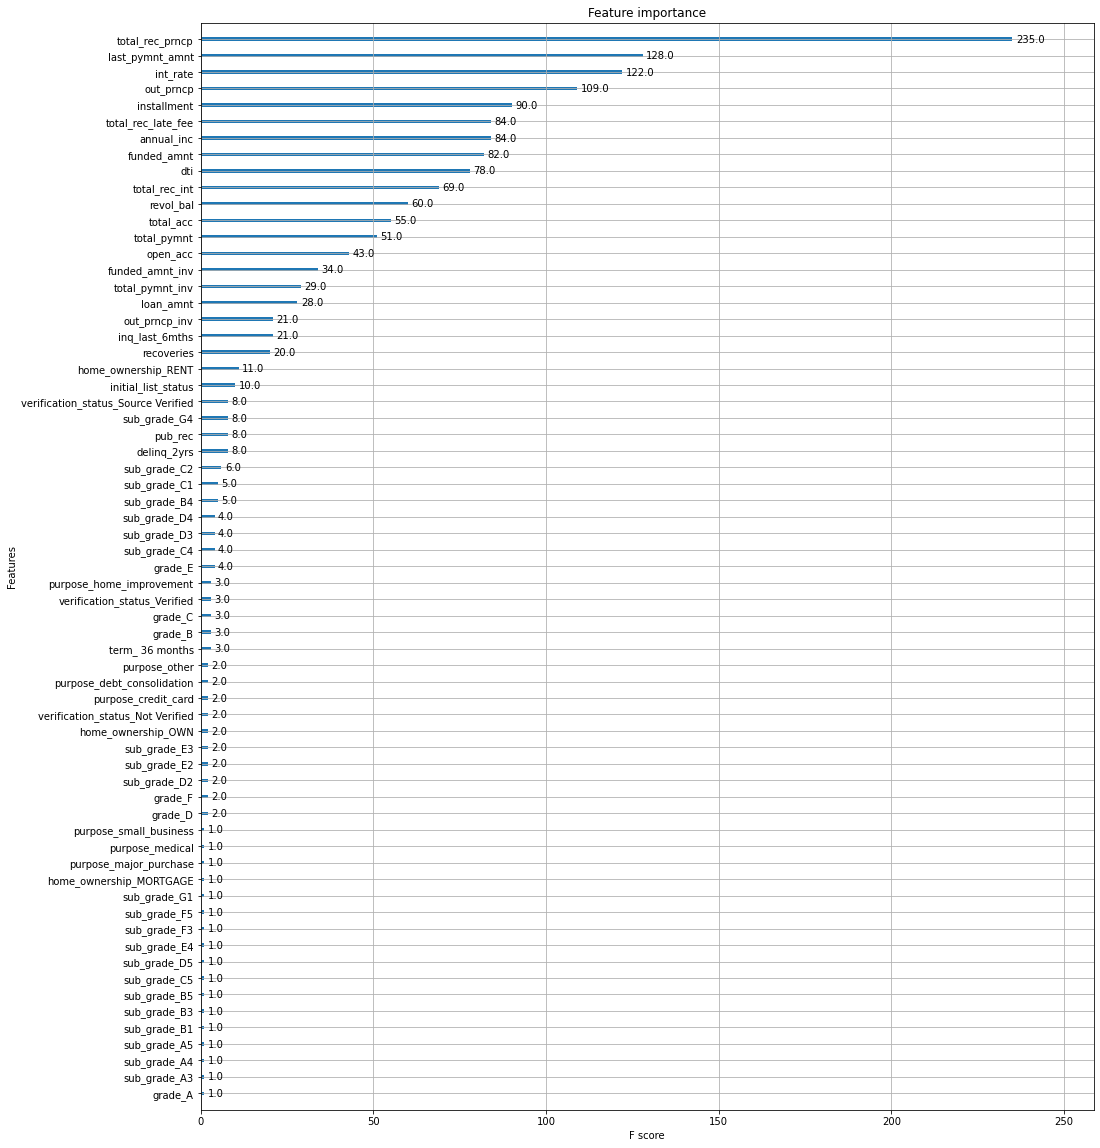

In [48]:
plt.figure(figsize=(16,20))
xgb.plot_importance(model, plt.gca())
plt.show()

### Making Predicting And Checking The Accuracy Of The Model On The Test Set

In [49]:
X_test_predictions = model.predict(X_test)

### Testing Set Accuracy Score

In [50]:
accuracy = accuracy_score(X_test_predictions, y_test) * 100

In [51]:
accuracy

99.83811343224333


### Testing set confusion Matrix Score

In [52]:
cf = confusion_matrix( y_test, X_test_predictions)

In [53]:
cf

array([[306491,      2],
       [   520,  15435]], dtype=int64)

## Classification Reports 

In [54]:
print(classification_report(y_test, X_test_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    306493
           1       1.00      0.97      0.98     15955

    accuracy                           1.00    322448
   macro avg       1.00      0.98      0.99    322448
weighted avg       1.00      1.00      1.00    322448



### Plotting The Confusion Matrix Using Seaborn

In [55]:
cf_matrix = confusion_matrix(y_test, X_test_predictions)

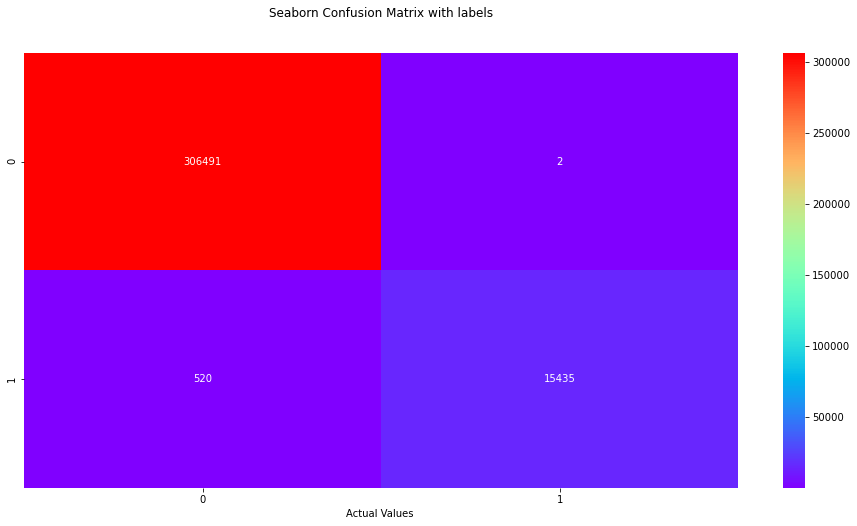

In [57]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='rainbow')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_xlabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()

### Checking The Accuracy Of The Model On The Training Set

In [58]:
X_train_predictions = model.predict(X_train)

In [59]:
accuracy_score(y_train, X_train_predictions)

0.9982081305140753

In [60]:
cf = confusion_matrix( y_train, X_train_predictions)

In [61]:
cf

array([[503009,      0],
       [   956,  29556]], dtype=int64)

## Saving Our Model Into a File

In [62]:
joblib.dump(model, 'Bank_Lending_Classification_model.pkl')

['Bank_Lending_Classification_model.pkl']

In [63]:
joblib.load('Bank_Lending_Classification_model.pkl')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)